In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 2. Normalize the images (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

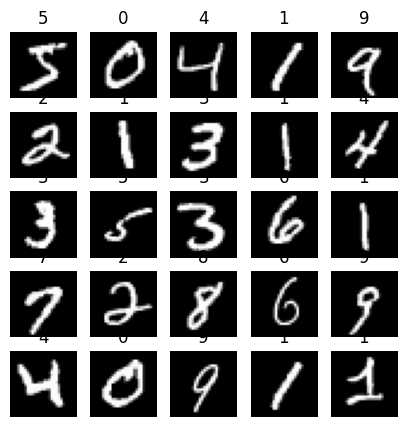

In [4]:
# 3. Visualize first 25 digits
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis("off")
plt.show()

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten 28x28 → 784
    Dense(128, activation='relu'),      # Hidden layer
    Dense(64, activation='relu'),       # Another hidden layer
    Dense(10, activation='softmax')     # Output layer (10 digits)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8742 - loss: 0.4241 - val_accuracy: 0.9608 - val_loss: 0.1249
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9687 - loss: 0.1051 - val_accuracy: 0.9675 - val_loss: 0.0995
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9774 - loss: 0.0710 - val_accuracy: 0.9739 - val_loss: 0.0809
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9831 - loss: 0.0547 - val_accuracy: 0.9711 - val_loss: 0.0907
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9862 - loss: 0.0416 - val_accuracy: 0.9751 - val_loss: 0.0838


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9751 - loss: 0.0838
Test accuracy: 0.9751
